In [32]:
import pandas as pd
import xgboost as xgb
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

In [3]:
df_ohe_var = pd.read_csv('C:\\Users\\jk\Desktop\\data science - infoshare\\projekt_SQL\\jdszr4-edc\\3-projekt-ml\\knn\\one_hot_encoded_var.csv')

df_ohe_corr = pd.read_csv('C:\\Users\\jk\\Desktop\\data science - infoshare\\projekt_SQL\\jdszr4-edc\\3-projekt-ml\\knn\\one_hot_encoded_corr.csv')


# Model dla danych przygotowanych z zastosowaniem one hot encodingu i wybranych na podstawie variance treshold

In [6]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(
    df_ohe_var.drop(['class_e', 'class_p'], axis=1),
    df_ohe_var['class_p'],
    test_size=0.25,
    random_state=40)

In [8]:
# model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\jk\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
#Accuracy

print(f'Accuracy of the xgb model euqals {accuracy_score(y_test, y_pred)}')

Accuracy of the xgb model euqals 1.0


In [25]:
# Raport modelu

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00       975

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(0, 0.5, 'True positive rate')

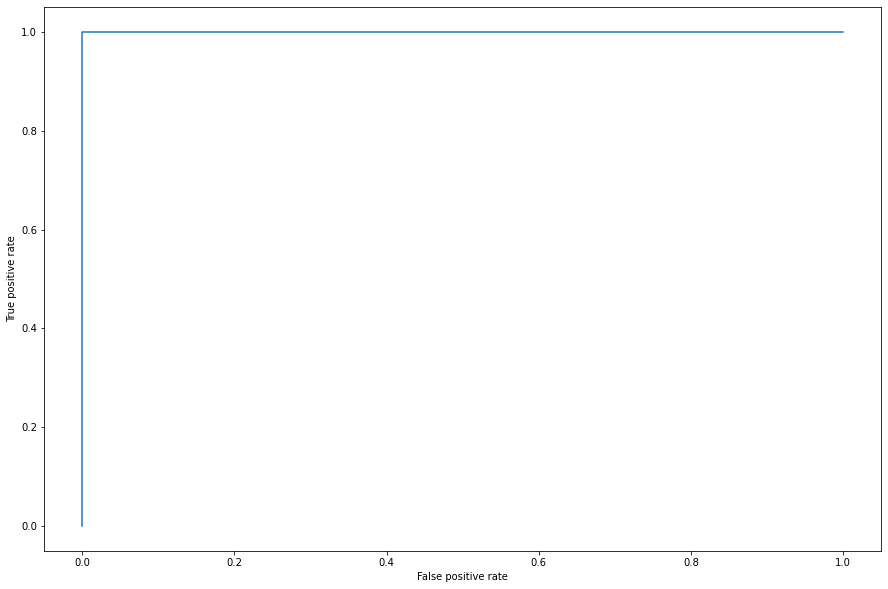

In [35]:
# Receiver operating characteristic
probas = model.predict_proba(X_test)
positive_proba = probas[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, positive_proba)
plt.figure(figsize=(15, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

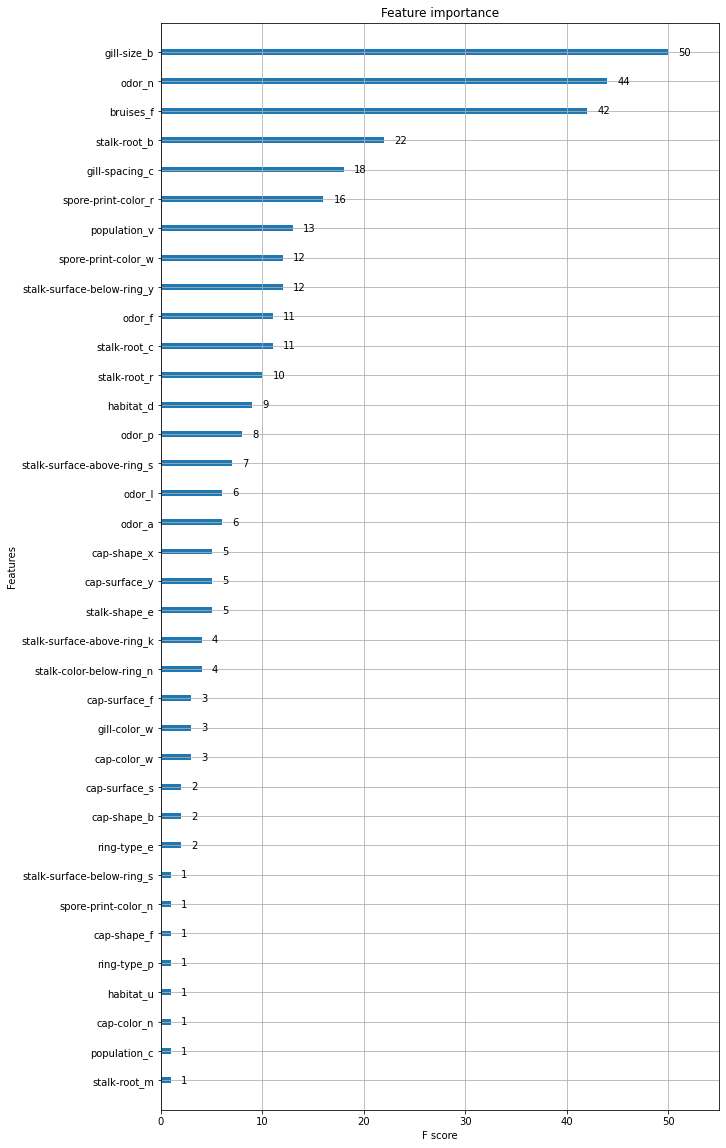

In [31]:
#Feature importance 
fig, ax = plt.subplots(figsize=(10, 20))
xgb.plot_importance(model, ax=ax)

# Model dla danych przygotowanych z zastosowaniem one hot encodingu i wybranych na podstawie korelacji

In [41]:
#train-test split
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    df_ohe_corr.drop(['class_e', 'class_p'], axis=1),
    df_ohe_corr['class_p'],
    test_size=0.25,
    random_state=40)

In [42]:
#model
model_corr = XGBClassifier()
model_corr.fit(X_train_corr,y_train_corr)
y_pred_corr = model_corr.predict(X_test_corr)

C:\Users\jk\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
# Raport modelu

print(classification_report(y_test_corr, y_pred_corr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       1.00      0.98      0.99       975

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



Text(0, 0.5, 'True positive rate')

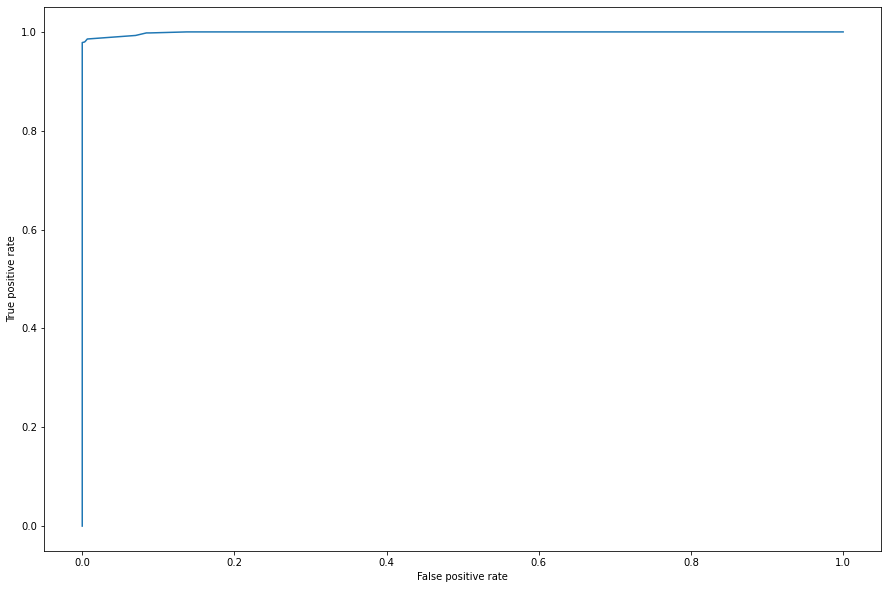

In [44]:
# Receiver operating characteristic
probas = model.predict_proba(X_test)
positive_proba = probas[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, positive_proba)
plt.figure(figsize=(15, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

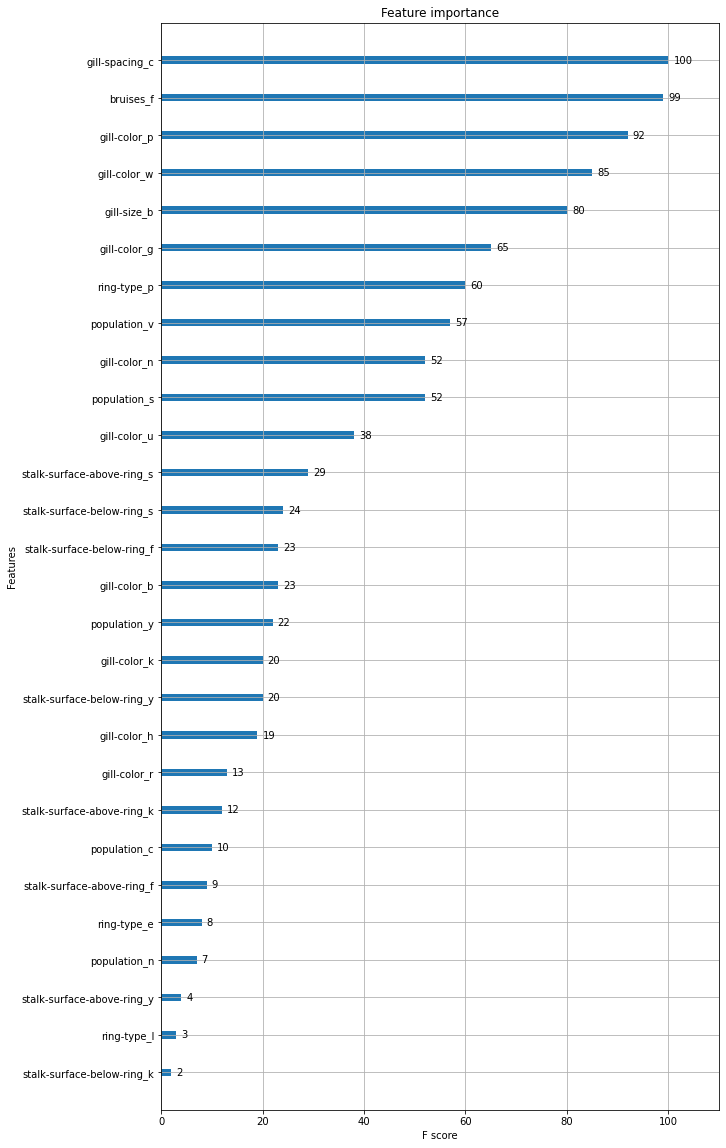

In [45]:
#Feature importance 
fig, ax = plt.subplots(figsize=(10, 20))
xgb.plot_importance(model, ax=ax)